import all the necessary libraries

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

now lets we will extract the data by pandas library

In [2]:
data=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\used car.xlsx")
data.head()

,Sr.No.,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


now as the column Sr.No. has not that much importance so lets we will drop that column

In [3]:
data.drop(['Sr.No.'],axis=1,inplace=True)

In [4]:
data.shape

(5918, 10)

our dataset contains 5918 rows and 10 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918 entries, 0 to 5917
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Brand      5918 non-null   object
 1   Model          5653 non-null   object
 2   Price          5918 non-null   int64 
 3   Model Year     5918 non-null   int64 
 4   Location       5918 non-null   object
 5   Fuel           5918 non-null   object
 6   Driven (Kms)   5918 non-null   int64 
 7   Gear           5653 non-null   object
 8   Ownership      5918 non-null   int64 
 9   EMI (monthly)  5918 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 462.5+ KB


it gives the information about data type and entries which are present in dataset

In [6]:
data.isnull().sum()

Car Brand          0
Model            265
Price              0
Model Year         0
Location           0
Fuel               0
Driven (Kms)       0
Gear             265
Ownership          0
EMI (monthly)      0
dtype: int64

dataset contains null values in column Model and Gear so lets we will remove it further

In [7]:
data['Model']=data['Model'].fillna(data['Model'].mode()[0])
data['Gear']=data['Gear'].fillna(data['Gear'].mode()[0])

In [8]:
data.isnull().sum()

Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

so dataset does not contains any null values now

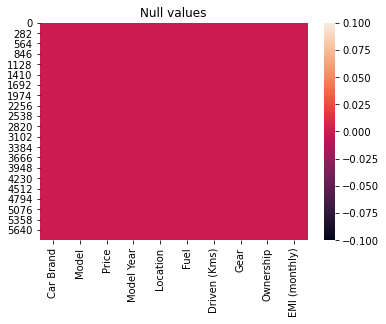

In [9]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

plot shows that there is no any null values present in dataset

In [10]:
data.columns

Index(['Car Brand', 'Model', 'Price', 'Model Year', 'Location', 'Fuel',
       'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)'],
      dtype='object')

now lets we will do the encoding of dataset because our dataset contains object type of data,so lets convert such column into int or float

# DATA ENCODING

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()
label=le.fit_transform(data["Location"])
label
le.classes_
data=data.drop("Location",axis='columns')
data["Location"]=label
le=LabelEncoder()
label=le.fit_transform(data["Fuel"])
label
le.classes_
data=data.drop("Fuel",axis='columns')
data["Fuel"]=label
le=LabelEncoder()
label=le.fit_transform(data["Gear"])
label
le.classes_
data=data.drop("Gear",axis='columns')
data["Gear"]=label
le=LabelEncoder()
label=le.fit_transform(data["Car Brand"])
label
le.classes_
data=data.drop("Car Brand",axis='columns')
data["Car Brand"]=label
data

,Model,Price,Model Year,Driven (Kms),Ownership,EMI (monthly),Location,Fuel,Gear,Car Brand
0,EonERA PLUS,330399,2016,10674,2,7350,3,2,1,7
1,Wagon R 1.0LXI,350199,2011,20979,1,7790,3,2,1,15
2,Alto K10LXI,229199,2011,47330,2,5098,3,2,1,15
3,RitzVXI BS IV,306399,2011,19662,1,6816,3,2,1,15
4,NanoTWIST XTA,208699,2015,11256,1,4642,3,2,0,23
...,...,...,...,...,...,...,...,...,...,...
5913,Fortuner3.0 AT 4X2,1234899,2012,197177,1,27470,1,0,0,24
5914,Innova2.5 VX 8 STR BS IV,892699,2012,115553,2,19858,1,0,1,24
5915,Wagon R 1.0VXI,381399,2014,24663,1,8484,1,2,1,15
5916,i10SPORTZ 1.2 KAPPA2 O,310899,2011,30159,1,6916,1,2,1,7


so the object type of data column are converted into int type dataset

In [13]:
data['Model'].unique()

array(['EonERA PLUS', 'Wagon R 1.0LXI', 'Alto K10LXI', 'RitzVXI BS IV',
       'NanoTWIST XTA', 'AltoLXI', 'Brio1.2 S MT I VTEC',
       'Wagon R 1.0VXI', 'i10SPORTZ 1.1 IRDE2', 'i10MAGNA 1.2 KAPPA2',
       'Brio1.2 V MT I VTEC', 'SwiftVXI', 'Alto 800LXI', 'Alto 800VXI',
       'Alto K10VXI', 'Santro XingGL PLUS', 'Grand i10ASTA 1.2 VTVT',
       'Eeco5 STR WITH AC PLUSHTR', 'KwidRXT 1.0 EASY-R AT OPTION',
       'AltoVXI', 'OMNI ESTD', 'i10SPORTZ 1.2 KAPPA2',
       'i20MAGNA 1.2 VTVT', 'Grand i10SPORTS 1.2 VTVT', 'i10ERA',
       'Wagon R 1.0LXI CNG', 'i10MAGNA 1.2', 'i10SPORTZ 1.2 AT KAPPA2',
       'Wagon R StingrayVXI', 'Grand i10SPORTZ O 1.2',
       'Grand i10SPORTZ 1.2 KAPPA VTVT', 'CelerioZXI OPT',
       'i10MAGNA 1.1 IRDE2', 'Jazz1.2 SV PETROL', 'DzireVDI',
       'Swift DzireVXI 1.2 BS IV', 'Elite i20SPORTZ 1.2',
       'Amaze1.2 VXMT I VTEC', 'BalenoALPHA 1.2 K12', 'AltoLXI CNG',
       'SwiftVXI 1.3', 'TiagoXT 1.2 REVOTRON', 'i10MAGNA', 'Jazz1.2 V MT',
       'Amaze1.2 S

In [14]:
import seaborn as sns

In [15]:
data_visualization_nominal=data[['Model']]

In [16]:
data_visualization_nominal.columns

Index(['Model'], dtype='object')

In [17]:
le=LabelEncoder()
label=le.fit_transform(data["Car Brand"])
label
le.classes_
data=data.drop("Car Brand",axis='columns')
data["Car Brand"]=label
data

,Model,Price,Model Year,Driven (Kms),Ownership,EMI (monthly),Location,Fuel,Gear,Car Brand
0,EonERA PLUS,330399,2016,10674,2,7350,3,2,1,7
1,Wagon R 1.0LXI,350199,2011,20979,1,7790,3,2,1,15
2,Alto K10LXI,229199,2011,47330,2,5098,3,2,1,15
3,RitzVXI BS IV,306399,2011,19662,1,6816,3,2,1,15
4,NanoTWIST XTA,208699,2015,11256,1,4642,3,2,0,23
...,...,...,...,...,...,...,...,...,...,...
5913,Fortuner3.0 AT 4X2,1234899,2012,197177,1,27470,1,0,0,24
5914,Innova2.5 VX 8 STR BS IV,892699,2012,115553,2,19858,1,0,1,24
5915,Wagon R 1.0VXI,381399,2014,24663,1,8484,1,2,1,15
5916,i10SPORTZ 1.2 KAPPA2 O,310899,2011,30159,1,6916,1,2,1,7


Alto 800LXI               449
Wagon R 1.0VXI            177
Alto K10VXI               156
SwiftVDI                  137
SwiftVXI                  135
                         ... 
CiazSHVS VDI                1
ScorpioEX                   1
CRV1.6 AT I DTEC            1
XJ3.0 DIESEL PORTFOLIO      1
Corolla AltisG AT           1
Name: Model, Length: 902, dtype: int64


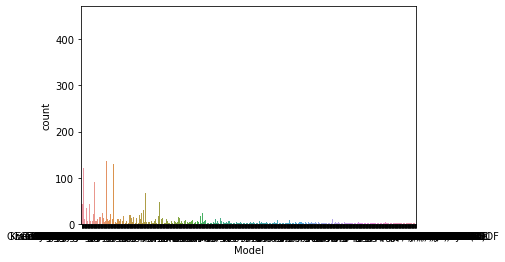

In [18]:
ax=sns.countplot(x="Model",data=data_visualization_nominal)
print(data_visualization_nominal["Model"].value_counts())

In [19]:
le=LabelEncoder()
label=le.fit_transform(data["Model"])
label
le.classes_
data=data.drop("Model",axis='columns')
data["Model"]=label
data

,Price,Model Year,Driven (Kms),Ownership,EMI (monthly),Location,Fuel,Gear,Car Brand,Model
0,330399,2016,10674,2,7350,3,2,1,7,308
1,350199,2011,20979,1,7790,3,2,1,15,811
2,229199,2011,47330,2,5098,3,2,1,15,31
3,306399,2011,19662,1,6816,3,2,1,15,611
4,208699,2015,11256,1,4642,3,2,0,23,526
...,...,...,...,...,...,...,...,...,...,...
5913,1234899,2012,197177,1,27470,1,0,0,24,373
5914,892699,2012,115553,2,19858,1,0,1,24,453
5915,381399,2014,24663,1,8484,1,2,1,15,813
5916,310899,2011,30159,1,6916,1,2,1,7,884


now lets we will describe our dataset in detail 

In [20]:
data.describe()

,Price,Model Year,Driven (Kms),Ownership,EMI (monthly),Location,Fuel,Gear,Car Brand,Model
count,5.918000e+03,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000
mean,5.180530e+05,2014.547651,60842.778979,1.285738,11523.801284,2.282528,1.366847,0.902332,13.085333,441.238087
std,3.224695e+05,2.905185,42362.990292,0.532820,7173.156118,1.355988,0.981886,0.296890,5.642913,298.032009
min,9.100000e+04,2007.000000,179.000000,1.000000,2024.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.205240e+05,2012.000000,30856.000000,1.000000,7129.750000,2.000000,0.000000,1.000000,7.000000,152.000000
50%,4.303990e+05,2015.000000,53514.000000,1.000000,9574.000000,2.000000,2.000000,1.000000,15.000000,423.500000
75%,6.157990e+05,2017.000000,81979.250000,1.000000,13698.000000,4.000000,2.000000,1.000000,15.000000,708.000000
max,6.500000e+06,2021.000000,912380.000000,4.000000,144589.000000,4.000000,4.000000,1.000000,26.000000,901.000000


it shows the total count of every column also the minimum to maximum values present in our dataset with its std and mean values
nowif we see the data it is seen that column location,fuel,gear,car brand,model contains zero values in its min row so lets remove that

In [21]:
#replacing zero values with mean of column 
data['Location']=data['Location'].replace(0,data['Location'].mean())
data['Fuel']=data['Fuel'].replace(0,data['Fuel'].mean())
data['Gear']=data['Gear'].replace(0,data['Gear'].mean())
data['Car Brand']=data['Car Brand'].replace(0,data['Car Brand'].mean())
data['Model']=data['Model'].replace(0,data['Model'].mean())

In [22]:
data.describe()

,Price,Model Year,Driven (Kms),Ownership,EMI (monthly),Location,Fuel,Gear,Car Brand,Model
count,5.918000e+03,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000,5918.000000
mean,5.180530e+05,2014.547651,60842.778979,1.285738,11523.801284,2.599567,1.820461,0.990461,13.140611,441.312646
std,3.224695e+05,2.905185,42362.990292,0.532820,7173.156118,1.007174,0.371717,0.028997,5.578169,297.976793
min,9.100000e+04,2007.000000,179.000000,1.000000,2024.000000,1.000000,1.000000,0.902332,1.000000,1.000000
25%,3.205240e+05,2012.000000,30856.000000,1.000000,7129.750000,2.000000,1.366847,1.000000,7.000000,152.250000
50%,4.303990e+05,2015.000000,53514.000000,1.000000,9574.000000,2.282528,2.000000,1.000000,15.000000,424.500000
75%,6.157990e+05,2017.000000,81979.250000,1.000000,13698.000000,4.000000,2.000000,1.000000,15.000000,708.000000
max,6.500000e+06,2021.000000,912380.000000,4.000000,144589.000000,4.000000,4.000000,1.000000,26.000000,901.000000


now lets we will plot heat map to find the correlation between target variable and sucessive column

<AxesSubplot:>

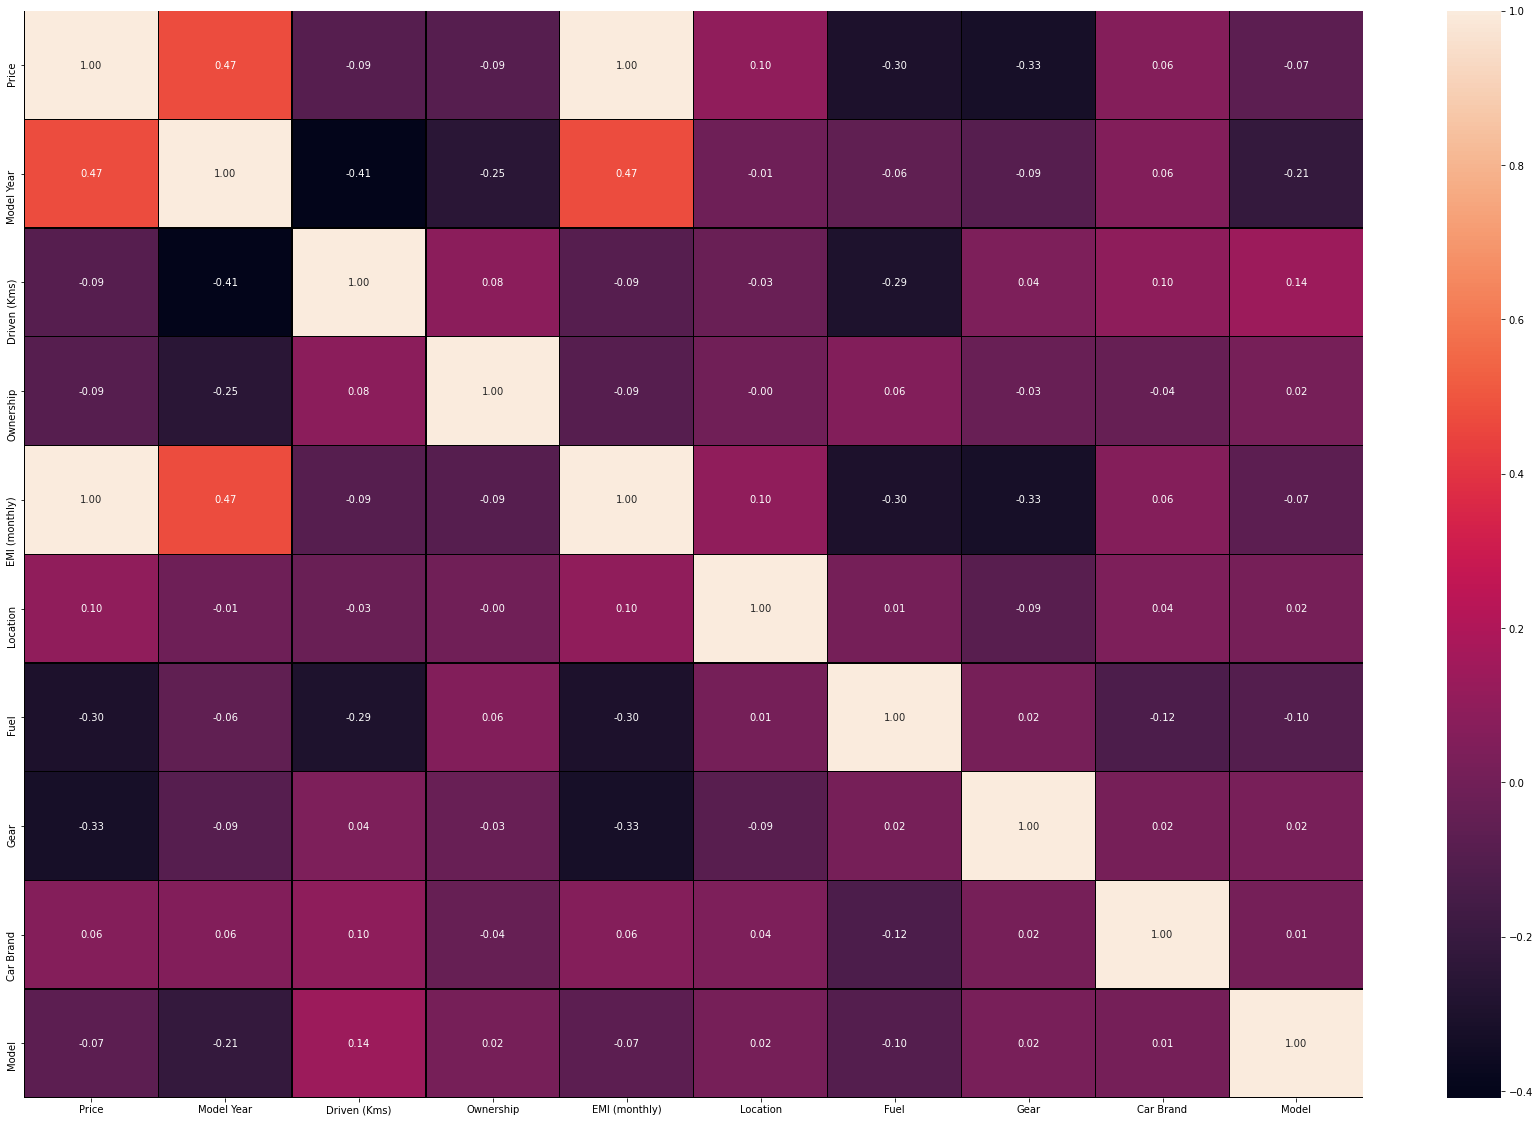

In [23]:
#heat map
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

it shows that column EMI(monthly),Model Year has maximum correlation with the price
now lets we will find the outliers present in the dataset with the box plot 

Price               AxesSubplot(0.125,0.749828;0.352273x0.130172)
Model Year       AxesSubplot(0.547727,0.749828;0.352273x0.130172)
Driven (Kms)        AxesSubplot(0.125,0.593621;0.352273x0.130172)
Ownership        AxesSubplot(0.547727,0.593621;0.352273x0.130172)
EMI (monthly)       AxesSubplot(0.125,0.437414;0.352273x0.130172)
Location         AxesSubplot(0.547727,0.437414;0.352273x0.130172)
Fuel                AxesSubplot(0.125,0.281207;0.352273x0.130172)
Gear             AxesSubplot(0.547727,0.281207;0.352273x0.130172)
Car Brand              AxesSubplot(0.125,0.125;0.352273x0.130172)
Model               AxesSubplot(0.547727,0.125;0.352273x0.130172)
dtype: object

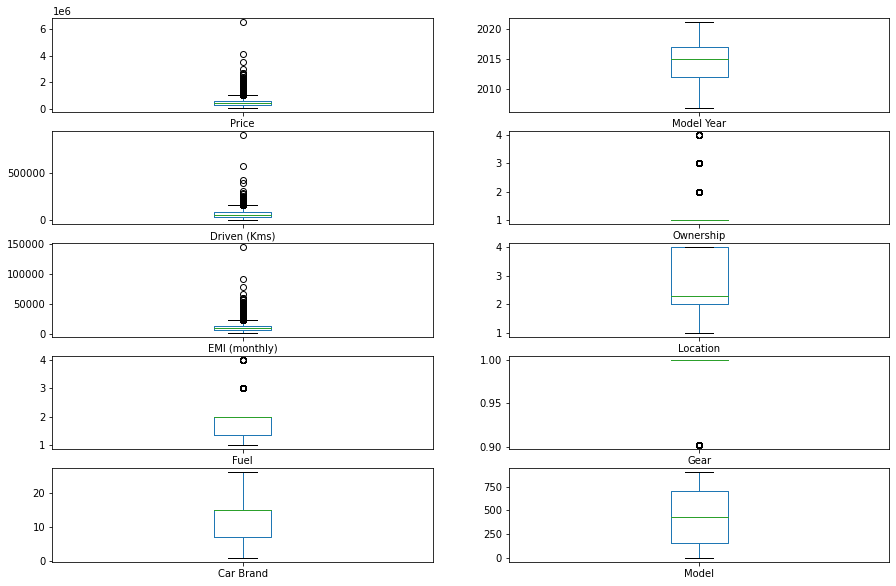

In [24]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(5,2),figsize = (15,10))

price.Driven(Kms),EMI(monthly) has contains some outliers lets we will remove it

In [25]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[0.58197695 0.49995839 1.18435969 ... 0.32899802 1.10092213 0.44743052]
 [0.52057061 1.22124798 0.94108436 ... 0.32899802 0.33336147 1.24076304]
 [0.89583158 1.22124798 0.319003   ... 0.32899802 0.33336147 1.37711166]
 ...
 [0.4238091  0.18852416 0.85411431 ... 0.32899802 0.33336147 1.24747554]
 [0.64245289 1.22124798 0.72436746 ... 0.32899802 1.10092213 1.48576926]
 [1.11044364 2.59821308 0.2265324  ... 0.32899802 0.33336147 1.27096929]]


In [26]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([   0,    0,    0, ..., 5917, 5917, 5917], dtype=int64), array([0, 1, 2, ..., 7, 8, 9], dtype=int64))
(5918, 10)


In [27]:
#Assign the value to df_new which are less the threshold value and removing the outliers
data_new=data[(z<3).all(axis = 1)]

In [28]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(5918, 10)
(4882, 10)
Shape after removing outlires (4882, 10)


Price               AxesSubplot(0.125,0.749828;0.352273x0.130172)
Model Year       AxesSubplot(0.547727,0.749828;0.352273x0.130172)
Driven (Kms)        AxesSubplot(0.125,0.593621;0.352273x0.130172)
Ownership        AxesSubplot(0.547727,0.593621;0.352273x0.130172)
EMI (monthly)       AxesSubplot(0.125,0.437414;0.352273x0.130172)
Location         AxesSubplot(0.547727,0.437414;0.352273x0.130172)
Fuel                AxesSubplot(0.125,0.281207;0.352273x0.130172)
Gear             AxesSubplot(0.547727,0.281207;0.352273x0.130172)
Car Brand              AxesSubplot(0.125,0.125;0.352273x0.130172)
Model               AxesSubplot(0.547727,0.125;0.352273x0.130172)
dtype: object

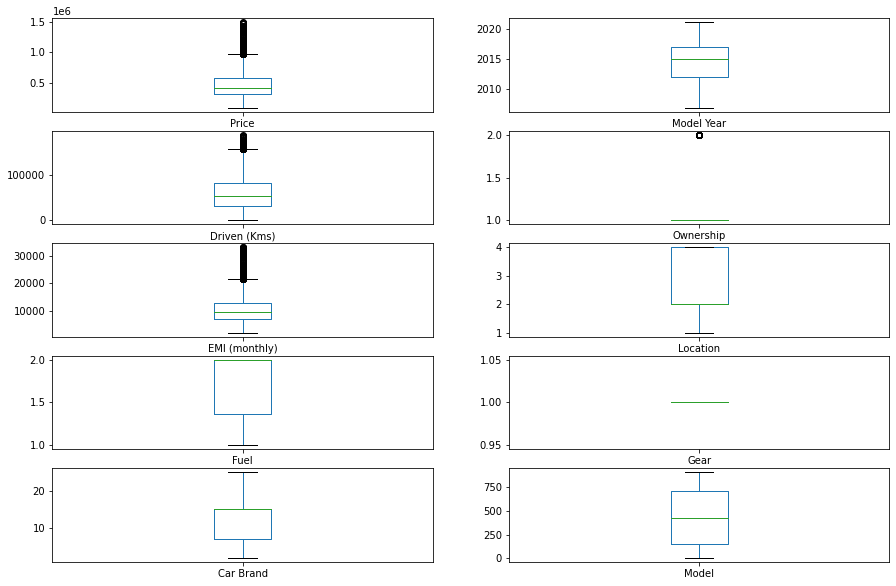

In [29]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(5,2),figsize = (15,10))

In [30]:
data.skew()

Price            1.319401
Model Year      -0.195612
Driven (Kms)     0.795508
Ownership        1.371186
EMI (monthly)    1.319404
Location         0.367108
Fuel            -0.698649
Gear             0.000000
Car Brand        0.175365
Model           -0.059945
dtype: float64

so column Driven(Kms),Ownership,EMI(monthly) has some skewness so lets remove it by sqrt

In [31]:
#remove skewness
data['Driven (Kms)']=np.sqrt(data['Driven (Kms)'])
data['Ownership']=np.sqrt(data['Ownership'])
data['EMI (monthly)']=np.sqrt(data['EMI (monthly)'])


In [32]:
data.skew()

Price            1.319401
Model Year      -0.195612
Driven (Kms)     0.025614
Ownership        1.371186
EMI (monthly)    0.680639
Location         0.367108
Fuel            -0.698649
Gear             0.000000
Car Brand        0.175365
Model           -0.059945
dtype: float64

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Model Year'}>],
       [<AxesSubplot:title={'center':'Driven (Kms)'}>,
        <AxesSubplot:title={'center':'Ownership'}>],
       [<AxesSubplot:title={'center':'EMI (monthly)'}>,
        <AxesSubplot:title={'center':'Location'}>],
       [<AxesSubplot:title={'center':'Fuel'}>,
        <AxesSubplot:title={'center':'Gear'}>],
       [<AxesSubplot:title={'center':'Car Brand'}>,
        <AxesSubplot:title={'center':'Model'}>]], dtype=object)

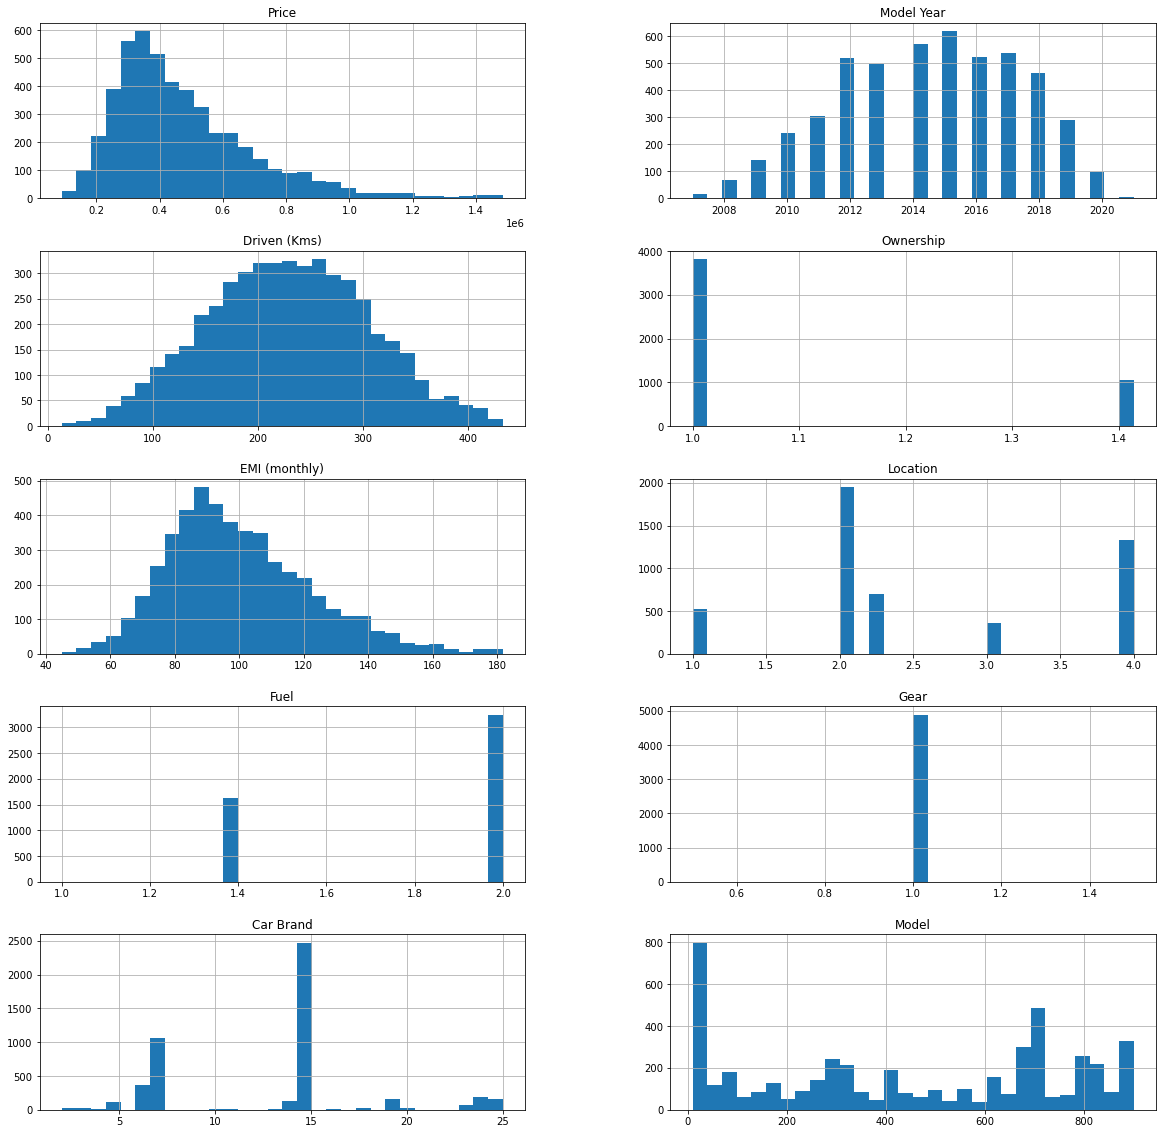

In [33]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (5,2), bins = 30)

it shows that data is uniformely distributed within column

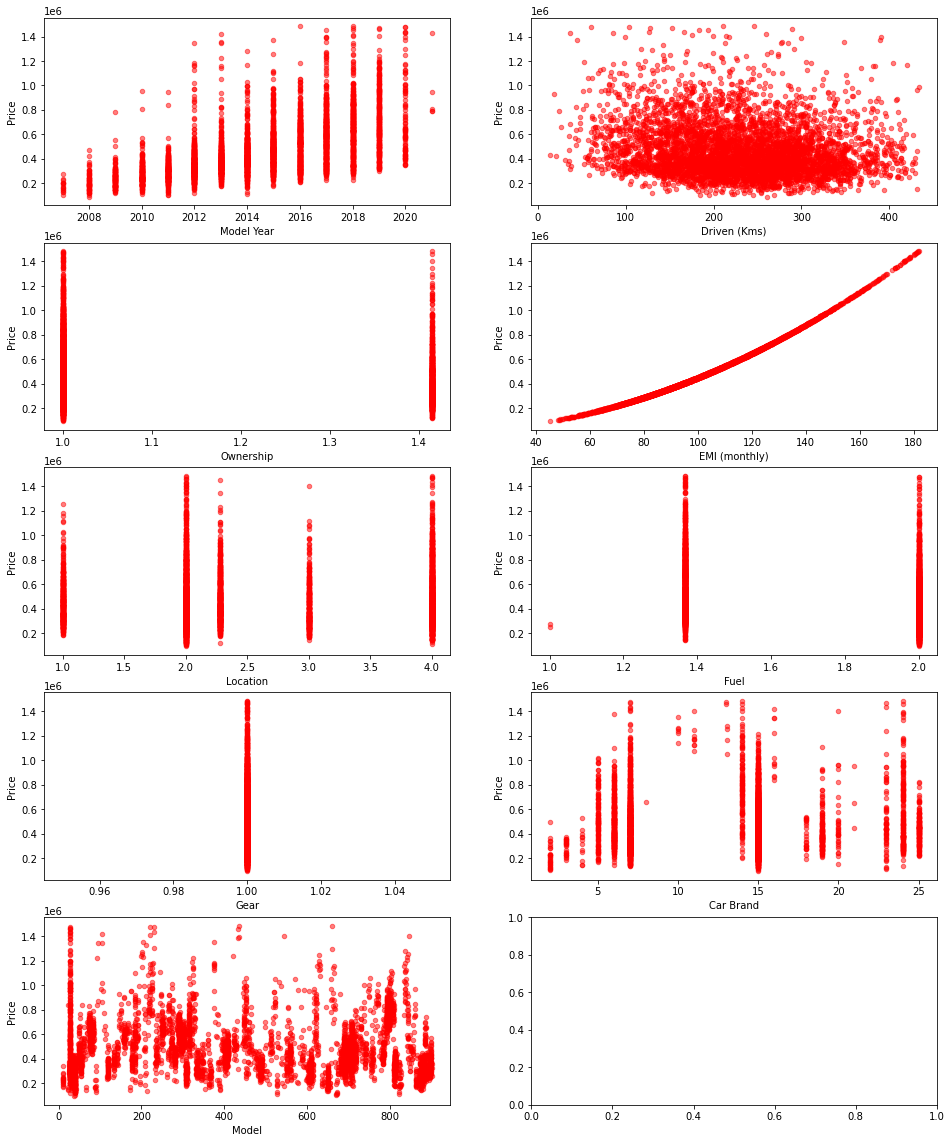

In [34]:
# setup figure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='Price', ax=ax, alpha=0.5, color='r')


it gives the corelation of every column with the target column

In [35]:
import warnings
warnings.filterwarnings('ignore')

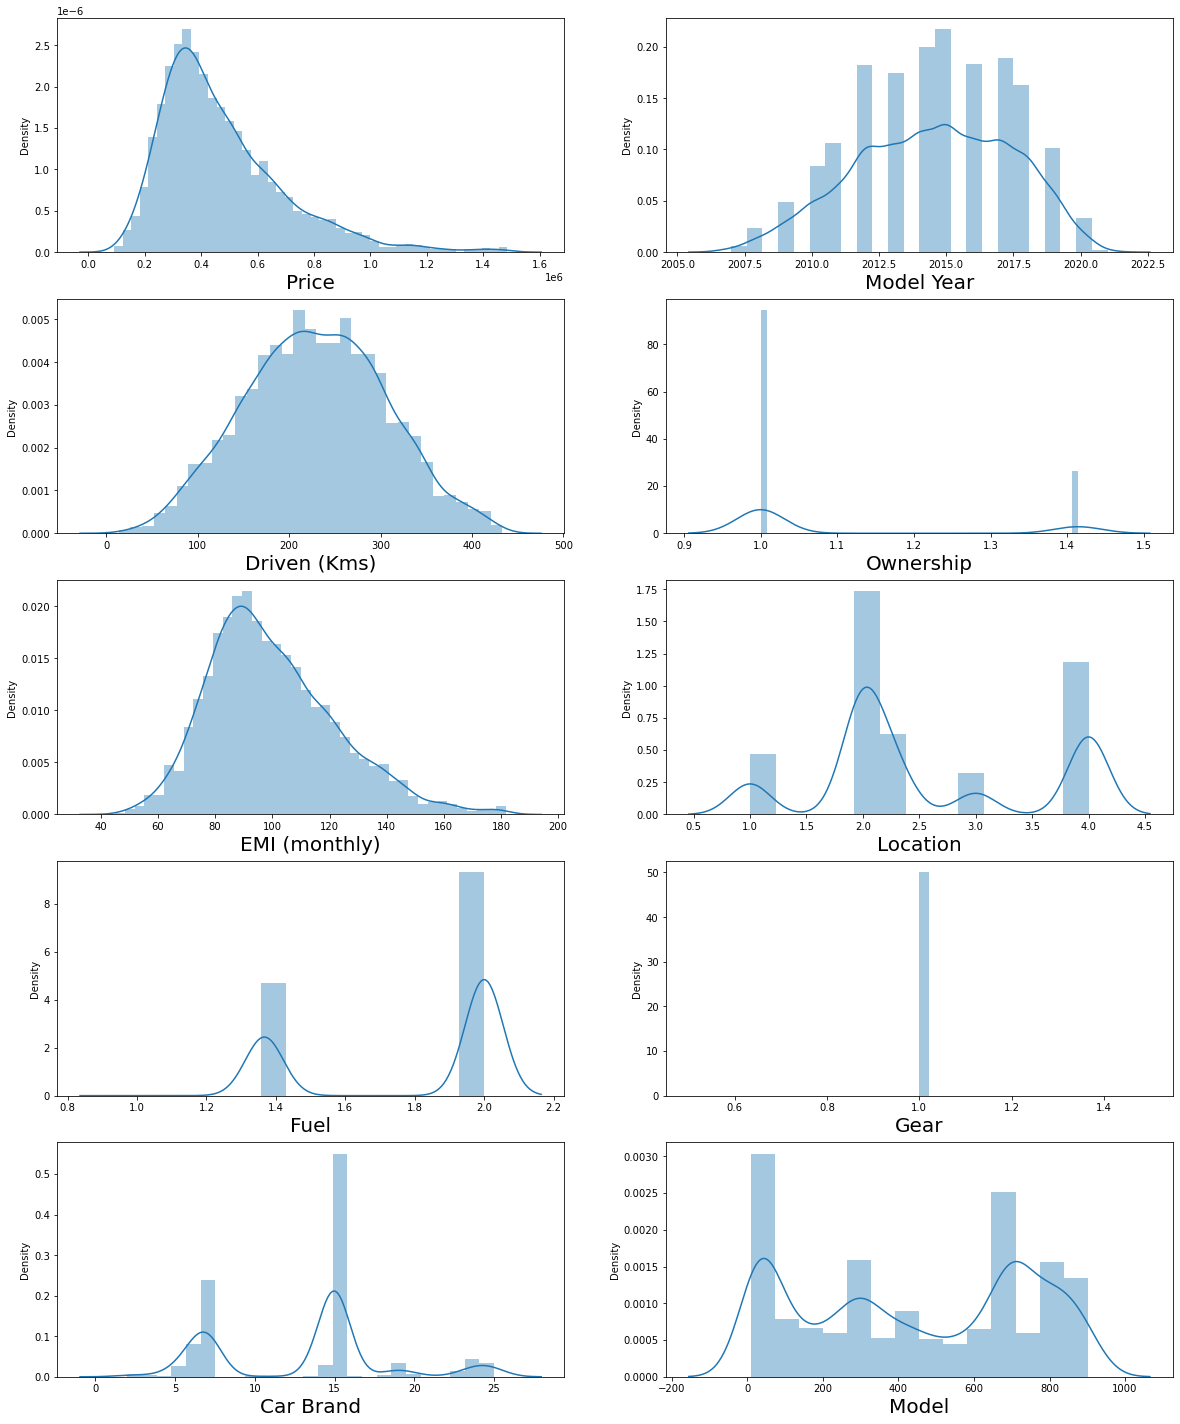

In [36]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [38]:
#devide data set into feature and label
y=data['Price']
x=data.drop(['Price'],axis=1)

In [39]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [40]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [41]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  40 is 0.9999446153499179
R2 score correspond to random state  40 is 0.8978131883304017
R2 score correspond to random state  40 is 0.9939147623344393
R2 score correspond to random state  40 is 0.9810857057767612
R2 score correspond to random state  40 is 0.9998949966287864
R2 score correspond to random state  41 is 0.9999324690232877
R2 score correspond to random state  41 is 0.9181991559761051
R2 score correspond to random state  41 is 0.9951423380060272
R2 score correspond to random state  41 is 0.9818125566579295
R2 score correspond to random state  41 is 0.9999013054357967
R2 score correspond to random state  42 is 0.9998943052343446
R2 score correspond to random state  42 is 0.9103943388820948
R2 score correspond to random state  42 is 0.9911817455342442
R2 score correspond to random state  42 is 0.9827076020607874
R2 score correspond to random state  42 is 0.9998757138890662
R2 score correspond to random state  43 is 0.9999623692264433
R2 score

maximum accuracy got for random state 77 of 99.99% for DecisionTreeRegressor() 

In [42]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 0.51268949, -1.63417026,  1.89771429, ...,  0.        ,
        -1.13104021, -0.45434566],
       [-1.22764572, -1.09569277, -0.52694971, ...,  0.        ,
         0.35313141,  1.2224436 ],
       [-1.22764572, -0.15280766,  1.89771429, ...,  0.        ,
         0.35313141, -1.3777465 ],
       ...,
       [-0.87957867,  1.43406544,  1.89771429, ...,  0.        ,
         2.02282447,  0.02902301],
       [-0.18344459, -0.93745077, -0.52694971, ...,  0.        ,
         0.35313141,  1.22911075],
       [-1.22764572, -0.72195096, -0.52694971, ...,  0.        ,
        -1.13104021,  1.46579472]])

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=77)

In [44]:
dtr=DecisionTreeRegressor()

In [45]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [46]:
pred_test=dtr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9999228289407224


# cross validation

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
for i in range(2,10):
    cv=cross_val_score(dtr,x,y,cv=i)
    print(dtr,cv.mean())


DecisionTreeRegressor() 0.9998893552539054
DecisionTreeRegressor() 0.9999532251523348
DecisionTreeRegressor() 0.9999282616825487
DecisionTreeRegressor() 0.9999649593266223
DecisionTreeRegressor() 0.9999528736700632
DecisionTreeRegressor() 0.9999554497283593
DecisionTreeRegressor() 0.9999592578102496
DecisionTreeRegressor() 0.9999693618224739


In [49]:
#lets plot and visualize
y_pred=dtr.predict(x_test)
y_pred

array([ 831999.,  360000., 1194399., ...,  638699.,  397299.,  408099.])

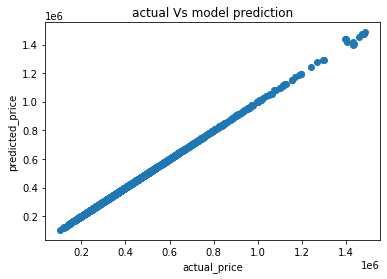

In [50]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_price')
plt.ylabel('predicted_price')
plt.title('actual Vs model prediction')
plt.show()

it gives the actual verses predicted price of vehicle

# Regularization

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')

In [52]:
parameters={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,30))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [53]:
from sklearn.metrics import r2_score

In [54]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9803354614896415

In [55]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9799043663968952

# Ensemble technique

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [59]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)                         

R2score: 99.9979771532304
cross val score: 99.99817426189661


# Saving Model

In [60]:
#saving model
import joblib
joblib.dump(dtr,'used_car_price_prediction')

['used_car_price_prediction']

# conclusion

In [61]:
loaded_model=joblib.load('used_car_price_prediction')
result=loaded_model.score(x_test,y_test)
print(result)

0.9999228289407224


so in this way we have sucessfully saved model and also drawn a score with the saved model